In [2]:
import numpy as np
import matplotlib.pyplot as pl


## FF=0

In [3]:
data = np.loadtxt('./results/BF_scaling_220+221_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]

In [4]:
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.50005 +- 0.00008


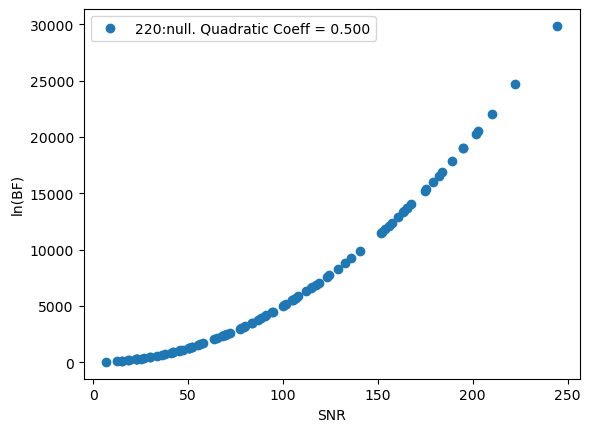

In [5]:
# data = np.loadtxt('./results/BF_scaling_220+221_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T

# pl.plot(SNRtot_MF, log_BF, 'o', label="220:null. Quadratic Coeff = 0.500")
# pl.xlabel("SNR")
# pl.ylabel("ln(BF)")
# pl.legend()

# data = np.loadtxt('./results/large_injection_space_220_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T

pl.plot(SNRtot_MF, log_BF, 'o', label="220:null. Quadratic Coeff = %.3f" % coeff[0])
pl.xlabel("SNR")
pl.ylabel("ln(BF)")
pl.legend()

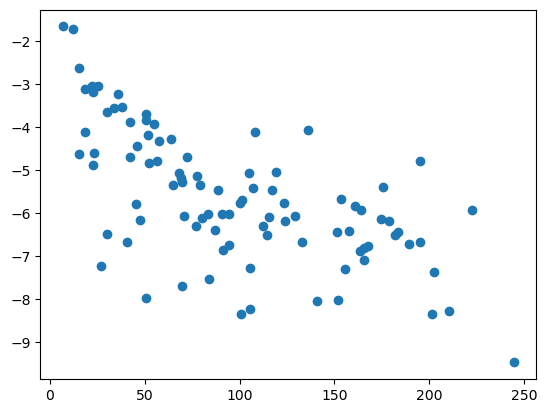

In [6]:
pl.plot(SNRtot_MF, np.log(occams), 'o')

In [7]:
# Suppress linear term
from scipy.optimize import curve_fit

func = lambda x, a, b: a*x**2 + b
fit = curve_fit(func, SNRtot_MF, log_BF)
fit

(array([ 0.49992403, -5.35000164]),
 array([[ 4.40784481e-10, -5.69790467e-06],
        [-5.69790467e-06,  1.51799611e-01]]))

Text(0, 0.5, 'PDF')

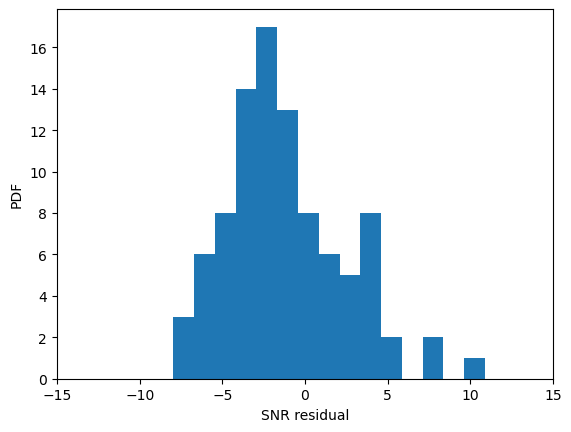

In [8]:
residual = 2*(log_BF-np.log(occams)) - SNRtot_MF**2
pl.hist(residual, bins=30);
pl.xlim(-15, 15)
pl.xlabel("SNR residual")
pl.ylabel("PDF")

In [9]:
np.quantile(residual, 0.025)

-7.1001746842015745

In [10]:
median = np.median(residual)
neg_err = median - np.quantile(residual, 0.025)
pos_err = np.quantile(residual, 0.975) - median

print(r"SNR residual = %.2f (+ %.2f) (- %.2f). 0.95 error region" % \
      (median, pos_err, neg_err))

SNR residual = -1.94 (+ 8.30) (- 5.16). 0.95 error region


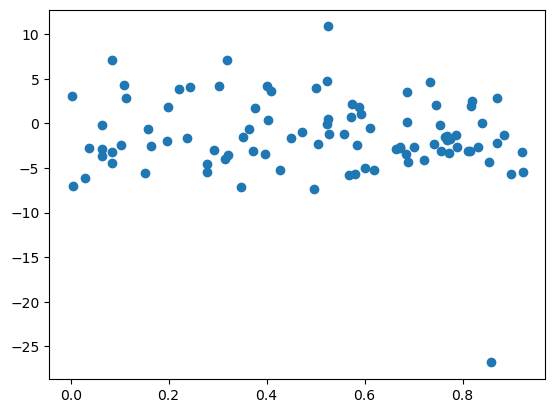

In [11]:
pl.plot(chi_inject, residual, 'o')

## FF != 0

Quadratic coefficient = 0.00070 +- 0.00015


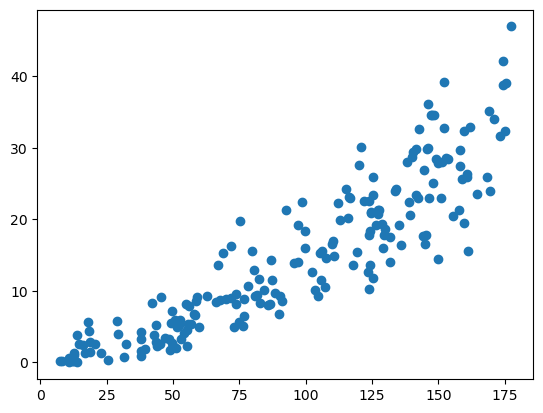

In [12]:
data = np.loadtxt('./results/BF_scaling_allFixed220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, log_BF, 'o', label="All fixed")

In [13]:
np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)

(array([0.00070033, 0.07181565, 0.04332004]),
 array([[ 2.29837436e-08, -4.21861579e-06,  1.39937150e-04],
        [-4.21861579e-06,  8.16739684e-04, -2.97464434e-02],
        [ 1.39937150e-04, -2.97464434e-02,  1.33916382e+00]]))

In [14]:
np.sqrt(err[0][0])

0.00015160390348322334

## Multiple modes

In [15]:
data = np.loadtxt('./results/BF_scaling_allFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.00181 +- 0.00015


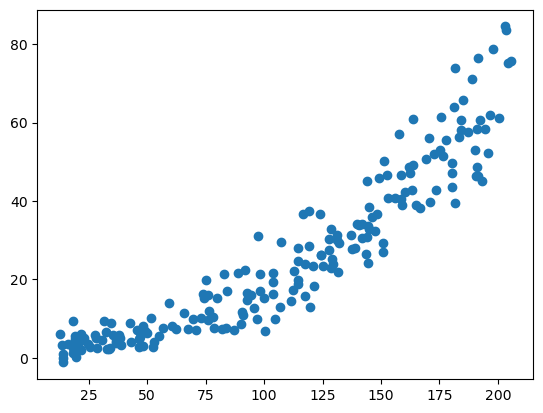

In [16]:
data = np.loadtxt('./results/BF_scaling_allFixed_220+221:220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, log_BF, 'o', label="All fixed")


# data = np.loadtxt('./results/BF_scaling_phiFixed_ampFixed_220+221:220_ALL.dat')
# idx = data.T[0]<250
# [SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
# occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
# log_BF = evidence_inj - evidence_filt
# pl.plot(SNRtot_MF, log_BF, 'o', label="Amp+phi fixed")

# data = np.loadtxt('./results/BF_scaling_phiFixed_chiFixed_ampFixed_220+221:220_ALL.dat')
# idx = data.T[0]<250
# [SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
# occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]
# log_BF = evidence_inj - evidence_filt
# pl.plot(SNRtot_MF, log_BF, 'o', label="Amp+phi+chi fixed")

# pl.xlabel("SNR")
# pl.ylabel("ln(BF)")
# pl.legend()